## Data preprocessing of UGR'16 data

### Load data and group by 5min time window and calculate overall bandwidth

In [2]:
import pandas as pd

df = pd.read_csv ('april.week2.csv.uniqblacklistremoved')
print (df)

           2016-04-06 17:20:34   52.016    43.164.44.61   42.219.159.85  \
0          2016-04-06 17:20:36  115.092  67.210.176.160  42.219.156.231   
1          2016-04-06 17:20:36  242.104    143.72.8.137   42.219.159.69   
2          2016-04-06 17:20:39    0.000  102.216.44.233    42.219.153.4   
3          2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156   
4          2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156   
...                        ...      ...             ...             ...   
564028837  2016-04-11 00:01:56   11.796  42.219.156.211   211.39.183.35   
564028838  2016-04-11 00:01:56   12.124  42.219.156.211  219.100.130.93   
564028839  2016-04-11 00:01:56   13.184  67.204.231.142  42.219.158.180   
564028840  2016-04-11 00:01:56   14.404  42.219.158.177   211.58.83.110   
564028841  2016-04-11 00:01:57  308.340    211.56.23.53   42.219.157.25   

             443  28445  UDP  .A....  0  0.1   76  81963  background  
0          52818    143  TCP

In [3]:
df.columns=['te','td','sa','da','sp','dp','pr','flg','fwd','stos','pkt','byt','label']

In [4]:
print(df.tail(100))

                            te       td              sa              da  \
564028742  2016-04-11 00:01:53   10.904    169.106.93.5  42.219.158.180   
564028743  2016-04-11 00:01:53   10.956  42.219.153.147  208.108.37.187   
564028744  2016-04-11 00:01:53   11.088  213.40.250.123  42.219.158.186   
564028745  2016-04-11 00:01:53   11.224    73.5.203.135  42.219.155.106   
564028746  2016-04-11 00:01:53   11.580   42.219.155.28    64.57.243.91   
...                        ...      ...             ...             ...   
564028837  2016-04-11 00:01:56   11.796  42.219.156.211   211.39.183.35   
564028838  2016-04-11 00:01:56   12.124  42.219.156.211  219.100.130.93   
564028839  2016-04-11 00:01:56   13.184  67.204.231.142  42.219.158.180   
564028840  2016-04-11 00:01:56   14.404  42.219.158.177   211.58.83.110   
564028841  2016-04-11 00:01:57  308.340    211.56.23.53   42.219.157.25   

              sp     dp   pr     flg  fwd  stos  pkt    byt       label  
564028742  50967    443  

In [5]:
# Keeping a copy
data = df

In [6]:
# Changing column data type for te
data['te'] = pd.to_datetime(df['te'])

In [7]:
data.describe

<bound method NDFrame.describe of                            te       td              sa              da     sp  \
0         2016-04-06 17:20:36  115.092  67.210.176.160  42.219.156.231  52818   
1         2016-04-06 17:20:36  242.104    143.72.8.137   42.219.159.69     53   
2         2016-04-06 17:20:39    0.000  102.216.44.233    42.219.153.4  52360   
3         2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53   
4         2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53   
...                       ...      ...             ...             ...    ...   
564028837 2016-04-11 00:01:56   11.796  42.219.156.211   211.39.183.35     80   
564028838 2016-04-11 00:01:56   12.124  42.219.156.211  219.100.130.93     80   
564028839 2016-04-11 00:01:56   13.184  67.204.231.142  42.219.158.180  44896   
564028840 2016-04-11 00:01:56   14.404  42.219.158.177   211.58.83.110    143   
564028841 2016-04-11 00:01:57  308.340    211.56.23.53   42.219.157.25   28

In [8]:
# Get start time of flow/transaction
data['ts'] = data['te'] - pd.to_timedelta(data.td, unit='ms')

In [9]:
print(data.head(10))

                   te       td              sa              da     sp     dp  \
0 2016-04-06 17:20:36  115.092  67.210.176.160  42.219.156.231  52818    143   
1 2016-04-06 17:20:36  242.104    143.72.8.137   42.219.159.69     53  32776   
2 2016-04-06 17:20:39    0.000  102.216.44.233    42.219.153.4  52360     80   
3 2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53  34620   
4 2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53  58451   
5 2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53  58925   
6 2016-04-06 17:20:39    0.000    143.72.4.250   42.219.159.85     53  46754   
7 2016-04-06 17:20:39    0.000    143.72.4.250   42.219.159.85     53  46760   
8 2016-04-06 17:20:39    0.000    143.72.4.250   42.219.159.85     53  49116   
9 2016-04-06 17:20:39    0.000    143.72.4.250   42.219.159.85     53  51454   

    pr     flg  fwd  stos  pkt   byt       label                         ts  
0  TCP  .AP...    0     0   19   941  bac

In [10]:
# Function to mark traffic has anomalous data when windowing
normal_traffic_type = ['background', 'blacklist']
def isAnomolus(x):
    data = ~x.isin(normal_traffic_type)
    if data.any():
        return 1
    else:
        return 0

In [11]:
# Data windowed for 5 min by adding pkt and byt, whreas label and true if any anomalous traffic exists in time window
data_win = data.groupby(pd.Grouper(key='te', freq='5T')).agg({
                                        "pkt":  "sum",
                                        "byt":  "sum",
                                        "label": isAnomolus
                                    })

In [12]:
print(data_win)

                          pkt          byt  label
te                                               
2016-04-06 17:20:00  12024288   8430871728      0
2016-04-06 17:25:00  14298084  10005573318      0
2016-04-06 17:30:00  12972964   8835532377      0
2016-04-06 17:35:00  15062355  10763871609      0
2016-04-06 17:40:00  13324225   9794741037      0
...                       ...          ...    ...
2016-04-10 23:40:00  10317441   7499235938      1
2016-04-10 23:45:00   8715832   5230529924      1
2016-04-10 23:50:00  10992020   8292543217      1
2016-04-10 23:55:00  12124602   9311754109      1
2016-04-11 00:00:00   5276180   4623247993      1

[1233 rows x 3 columns]


In [13]:
# Get all unique labels
data.label.unique()

array(['background', 'blacklist', 'anomaly-spam', 'anomaly-sshscan'],
      dtype=object)

### Taking only normal traffic(including blacklisted) 
The idea is to forecats the normal traffic, and compare with anomalous traffic for any deviation. Hence getting normal traffic windowed for each 5min which will be used for forecasting.

In [14]:
# Filter normal traffic
data_normal_traffic = data[data['label'].isin(normal_traffic_type)] 

In [15]:
# Window normal traffic for 5min window
data_normal_traffic_win = data_normal_traffic.groupby(pd.Grouper(key='te', freq='5T')).agg({
                                        "pkt":  "sum",
                                        "byt":  "sum"
                                    })

In [16]:
#Importing plot lib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 100)})

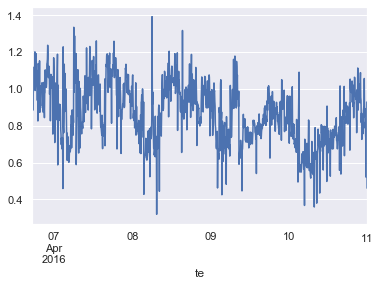

In [17]:
plt.figure()
data_normal_traffic_win_scaledown = data_normal_traffic_win.divide(10000000000)
data_normal_traffic_win_scaledown['byt'].plot()

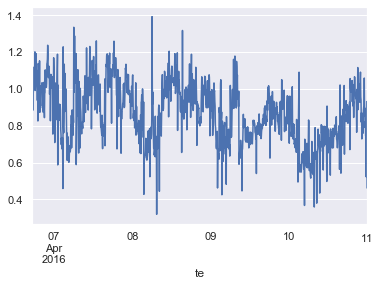

In [18]:
data_win_scaledown = data_win.divide(10000000000)
data_win_scaledown['byt'].plot()

In [19]:
data.describe

<bound method NDFrame.describe of                            te       td              sa              da     sp  \
0         2016-04-06 17:20:36  115.092  67.210.176.160  42.219.156.231  52818   
1         2016-04-06 17:20:36  242.104    143.72.8.137   42.219.159.69     53   
2         2016-04-06 17:20:39    0.000  102.216.44.233    42.219.153.4  52360   
3         2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53   
4         2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53   
...                       ...      ...             ...             ...    ...   
564028837 2016-04-11 00:01:56   11.796  42.219.156.211   211.39.183.35     80   
564028838 2016-04-11 00:01:56   12.124  42.219.156.211  219.100.130.93     80   
564028839 2016-04-11 00:01:56   13.184  67.204.231.142  42.219.158.180  44896   
564028840 2016-04-11 00:01:56   14.404  42.219.158.177   211.58.83.110    143   
564028841 2016-04-11 00:01:57  308.340    211.56.23.53   42.219.157.25   28

In [20]:
data_normal_traffic.describe

<bound method NDFrame.describe of                            te       td              sa              da     sp  \
0         2016-04-06 17:20:36  115.092  67.210.176.160  42.219.156.231  52818   
1         2016-04-06 17:20:36  242.104    143.72.8.137   42.219.159.69     53   
2         2016-04-06 17:20:39    0.000  102.216.44.233    42.219.153.4  52360   
3         2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53   
4         2016-04-06 17:20:39    0.000    143.72.4.250  42.219.154.156     53   
...                       ...      ...             ...             ...    ...   
564028837 2016-04-11 00:01:56   11.796  42.219.156.211   211.39.183.35     80   
564028838 2016-04-11 00:01:56   12.124  42.219.156.211  219.100.130.93     80   
564028839 2016-04-11 00:01:56   13.184  67.204.231.142  42.219.158.180  44896   
564028840 2016-04-11 00:01:56   14.404  42.219.158.177   211.58.83.110    143   
564028841 2016-04-11 00:01:57  308.340    211.56.23.53   42.219.157.25   28

In [21]:
data_anomaly_traffic = data[~data['label'].isin(normal_traffic_type)] 

In [22]:
print(data_anomaly_traffic)

                           te      td              sa              da     sp  \
7249799   2016-04-06 18:25:53   6.192  193.26.243.145  42.219.156.212     25   
7249834   2016-04-06 18:25:53   7.364  42.219.156.212  193.26.243.145  45829   
7249889   2016-04-06 18:25:53   9.404  193.26.243.129  42.219.156.223     25   
7249893   2016-04-06 18:25:53   9.576  42.219.156.223  193.26.243.129  44981   
7251496   2016-04-06 18:25:54   5.428  193.26.243.174  42.219.156.213     25   
...                       ...     ...             ...             ...    ...   
564028596 2016-04-11 00:01:50   5.040  42.219.156.231    71.62.189.34  51238   
564028614 2016-04-11 00:01:50   8.384  42.219.156.231    71.62.187.87  55636   
564028618 2016-04-11 00:01:50   8.676    71.62.187.87  42.219.156.231     22   
564028683 2016-04-11 00:01:51   9.440  42.219.156.231    71.62.189.16  35309   
564028684 2016-04-11 00:01:52  10.044    71.62.189.16  42.219.156.231     22   

              dp   pr     flg  fwd  sto

In [23]:
merged_data = pd.merge(data_win, data_normal_traffic_win, on=['te'], how='inner')

In [24]:
print(merged_data)

                        pkt_x        byt_x  label     pkt_y        byt_y
te                                                                      
2016-04-06 17:20:00  12024288   8430871728      0  12024288   8430871728
2016-04-06 17:25:00  14298084  10005573318      0  14298084  10005573318
2016-04-06 17:30:00  12972964   8835532377      0  12972964   8835532377
2016-04-06 17:35:00  15062355  10763871609      0  15062355  10763871609
2016-04-06 17:40:00  13324225   9794741037      0  13324225   9794741037
...                       ...          ...    ...       ...          ...
2016-04-10 23:40:00  10317441   7499235938      1  10085890   7475150329
2016-04-10 23:45:00   8715832   5230529924      1   8483657   5206373108
2016-04-10 23:50:00  10992020   8292543217      1  10758037   8268213874
2016-04-10 23:55:00  12124602   9311754109      1  11888127   9287190911
2016-04-11 00:00:00   5276180   4623247993      1   5185516   4613826068

[1233 rows x 5 columns]


In [25]:
merged_data['byt_diff'] = merged_data.byt_x - merged_data.byt_y

In [26]:
print(merged_data.tail(30))

                        pkt_x        byt_x  label     pkt_y        byt_y  \
te                                                                         
2016-04-10 21:35:00  13006069   9727464478      1  12772637   9703075677   
2016-04-10 21:40:00  13193204  10108199455      1  12957536  10083594991   
2016-04-10 21:45:00  13444313  10215172294      1  13201136  10189799100   
2016-04-10 21:50:00  12336148   9273748647      1  12088081   9247875532   
2016-04-10 21:55:00  13474418  10474311503      1  13225672  10448383025   
2016-04-10 22:00:00  13932724  10909647979      1  13682795  10883595113   
2016-04-10 22:05:00  12463681   9570960867      1  12220175   9545580317   
2016-04-10 22:10:00  12340477   9394390085      1  12098387   9369156313   
2016-04-10 22:15:00  10978890   8197283315      1  10736362   8171993487   
2016-04-10 22:20:00  12007387   8710118203      1  11767587   8685118662   
2016-04-10 22:25:00  10535252   7285346671      1  10298090   7260617582   
2016-04-10 2

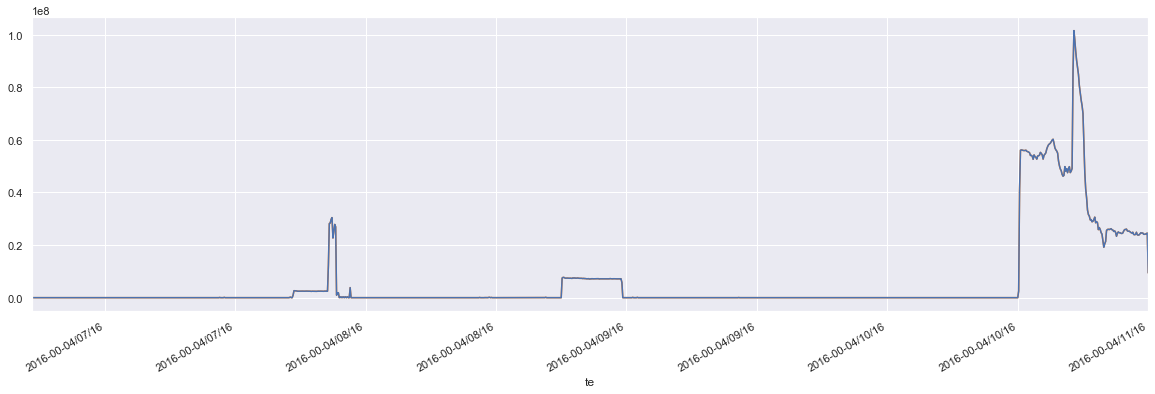

In [27]:
import matplotlib.dates as mdates
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(merged_data.byt_diff, color='tab:orange', label='Difference')
myFmt = mdates.DateFormatter('%Y-%M-%D')
ax.xaxis.set_major_formatter(myFmt)
merged_data.byt_diff.plot()

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2016-04-06 17:20:00 to 2016-04-11 00:00:00
Data columns (total 6 columns):
pkt_x       1233 non-null int64
byt_x       1233 non-null int64
label       1233 non-null int64
pkt_y       1233 non-null int64
byt_y       1233 non-null int64
byt_diff    1233 non-null int64
dtypes: int64(6)
memory usage: 67.4 KB


In [29]:
merged_data['byt_diff_scaled'] = merged_data['byt_diff']/10000000

In [30]:
print(merged_data.head(20))

                        pkt_x        byt_x  label     pkt_y        byt_y  \
te                                                                         
2016-04-06 17:20:00  12024288   8430871728      0  12024288   8430871728   
2016-04-06 17:25:00  14298084  10005573318      0  14298084  10005573318   
2016-04-06 17:30:00  12972964   8835532377      0  12972964   8835532377   
2016-04-06 17:35:00  15062355  10763871609      0  15062355  10763871609   
2016-04-06 17:40:00  13324225   9794741037      0  13324225   9794741037   
2016-04-06 17:45:00  14595281  10539076236      0  14595281  10539076236   
2016-04-06 17:50:00  15011001  10593487337      0  15011001  10593487337   
2016-04-06 17:55:00  15320880  11187455843      0  15320880  11187455843   
2016-04-06 18:00:00  14893614  10566279050      0  14893614  10566279050   
2016-04-06 18:05:00  15233097  11012020976      0  15233097  11012020976   
2016-04-06 18:10:00  16461150  12010746124      0  16461150  12010746124   
2016-04-06 1

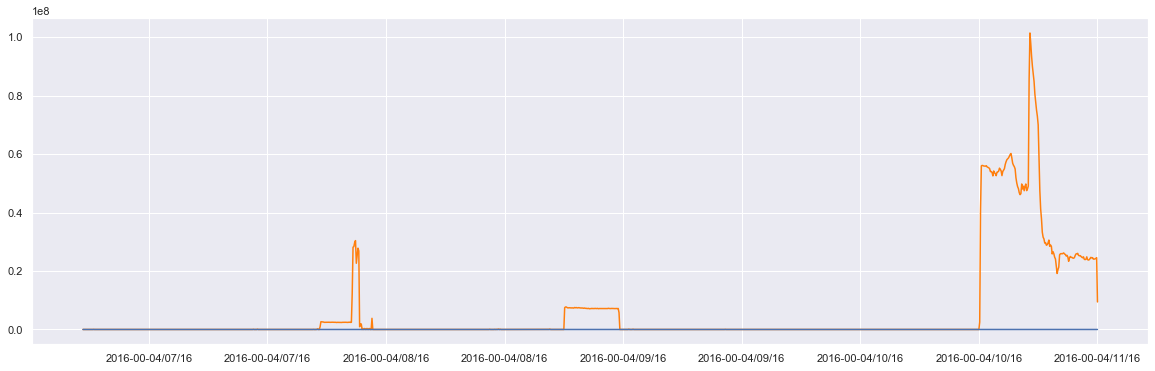

In [31]:
import matplotlib.dates as mdates
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(merged_data.byt_diff, color='tab:orange', label='Difference')
myFmt = mdates.DateFormatter('%Y-%M-%D')
ax.xaxis.set_major_formatter(myFmt)
ax.plot(merged_data.label)

### EDA for windowed data

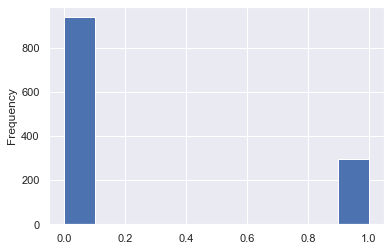

In [32]:
data_win.label.plot.hist()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


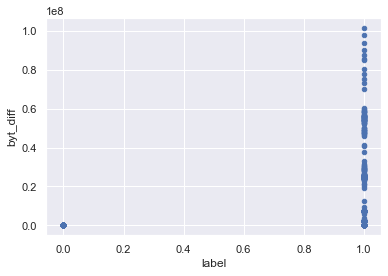

In [33]:
merged_data.reset_index().plot.scatter(x='label',y='byt_diff')

In [34]:
merged_data[(merged_data.byt_diff == 0) & (merged_data.label == 1)].count()

pkt_x              0
byt_x              0
label              0
pkt_y              0
byt_y              0
byt_diff           0
byt_diff_scaled    0
dtype: int64

In [35]:
merged_data[merged_data.byt_diff !=0].byt_diff.nsmallest(40)

te
2016-04-08 07:20:00        124
2016-04-08 07:25:00        124
2016-04-08 07:45:00        124
2016-04-08 08:25:00        124
2016-04-08 08:30:00        124
2016-04-07 16:45:00        420
2016-04-07 22:25:00       1401
2016-04-09 13:25:00      20078
2016-04-09 16:55:00      20119
2016-04-07 12:30:00      32357
2016-04-08 16:30:00      35083
2016-04-06 18:25:00      41623
2016-04-07 16:40:00      41904
2016-04-08 11:00:00      42409
2016-04-08 11:10:00      42616
2016-04-07 17:00:00      44172
2016-04-09 10:20:00      52687
2016-04-07 10:35:00      75865
2016-04-08 10:30:00      76688
2016-04-08 11:35:00      77061
2016-04-08 11:20:00     100816
2016-04-07 11:00:00     108169
2016-04-09 00:35:00     108701
2016-04-09 01:00:00     109027
2016-04-08 11:25:00     125016
2016-04-08 16:35:00     134616
2016-04-07 17:05:00     218275
2016-04-07 22:20:00     334460
2016-04-07 21:50:00     335839
2016-04-07 22:00:00     335931
2016-04-07 22:10:00     335962
2016-04-07 21:40:00     336750
2016-

In [36]:
data['anomaly'] = data['label'].apply(lambda x: 0 if x in(normal_traffic_type) else 1)

In [37]:
protocols = ['TCP', 'UDP', 'ICMP', 'GRE', 'ESP', 'RSVP', 'IPv6', 'IPIP', '255','nan']
data['protocol'] = data['pr'].apply(lambda x: protocols.index(x) if x in protocols else -1)

In [38]:
data_anomaly_traffic['pr'].unique()

array(['TCP'], dtype=object)

In [39]:
data_anomaly_traffic['flg'].unique()

array(['.AP.SF', '.APRS.', '...R..', '.AP.S.', '.AP..F', '.APR..',
       '.A..SF', '.A.RS.', '.A.R..', '.AP...', '.A..S.', '....S.',
       '...RS.', '.A.RSF', '.A.R.F', '.A...F', '.APRSF', '.A....',
       '.APR.F', 'U.PR.F', 'U.P.SF'], dtype=object)

In [40]:
data['pr'].unique()

array(['TCP', 'UDP', 'ICMP', 'GRE', 'ESP', 'RSVP', 'IPv6', 'IPIP', '255',
       nan], dtype=object)

In [41]:
data['flg'].unique()

array(['.AP...', '.A....', '....S.', '.A...F', '.A.R..', '.A..S.',
       '.AP.SF', '.AP.S.', '.AP..F', '...R..', '.APR..', '.A..SF',
       '.APRSF', '.APRS.', '.A.RSF', '.A.R.F', '...RS.', '.A.RS.',
       '.APR.F', '......', 'UAP.SF', '..P.S.', 'UAP...', '..P.SF',
       'UA.RS.', 'U.P.S.', '..PR.F', '.....F', 'UA..SF', 'UA...F',
       'UAP..F', 'U...S.', 'UAPRSF', 'U..RSF', '...R.F', 'UA.R..',
       '..PRS.', 'U..RS.', '....SF', 'U..R..', 'U...SF', 'UA....',
       'UAPR..', 'UAPRS.', 'UAP.S.', 'U.P..F', 'UA..S.', 'U.P.SF',
       'U.PRSF', 'UAPR.F', 'UA.R.F', 'U....F', '..PR..', '..PRSF',
       'U.PR.F', '..P...', 'U.P...', 'UA.RSF', 'U.PRS.', 'U.PR..',
       'U..R.F', '...RSF', 'U.....', '..P..F'], dtype=object)

In [42]:
data['protocol'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, -1])